<a href="https://colab.research.google.com/github/PuroshotamSingh/hotel-booking-analysis/blob/main/Hotel_Booking_Analysis_Puroshotam_Singh_Capstone_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading dataset and storing it in dataframe

df = pd.read_csv('/content/drive/MyDrive/Copy of Hotel Bookings.csv')

In [3]:
# Printing first 5 rows of dataframe

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# Printing last 5 rows of dataframe

df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [5]:
# Printing shape of dataframe

df.shape

(119390, 32)

In [6]:
# List of columns present in dataset

list(df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [7]:
# Basic information of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
# Checking for total null values in each column

df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

In [9]:
# Percentage of null values in each column

print(100*(df.isnull().sum()/len(df.index)).sort_values(ascending=False))

company                           94.306893
agent                             13.686238
country                            0.408744
children                           0.003350
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
is_canceled                        0.000000
market_segment                     0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
babies                             0.000000
meal                               0.000000
reservation_status_date            0.000000
distribution_channel               0.000000
reservation_status                 0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type              

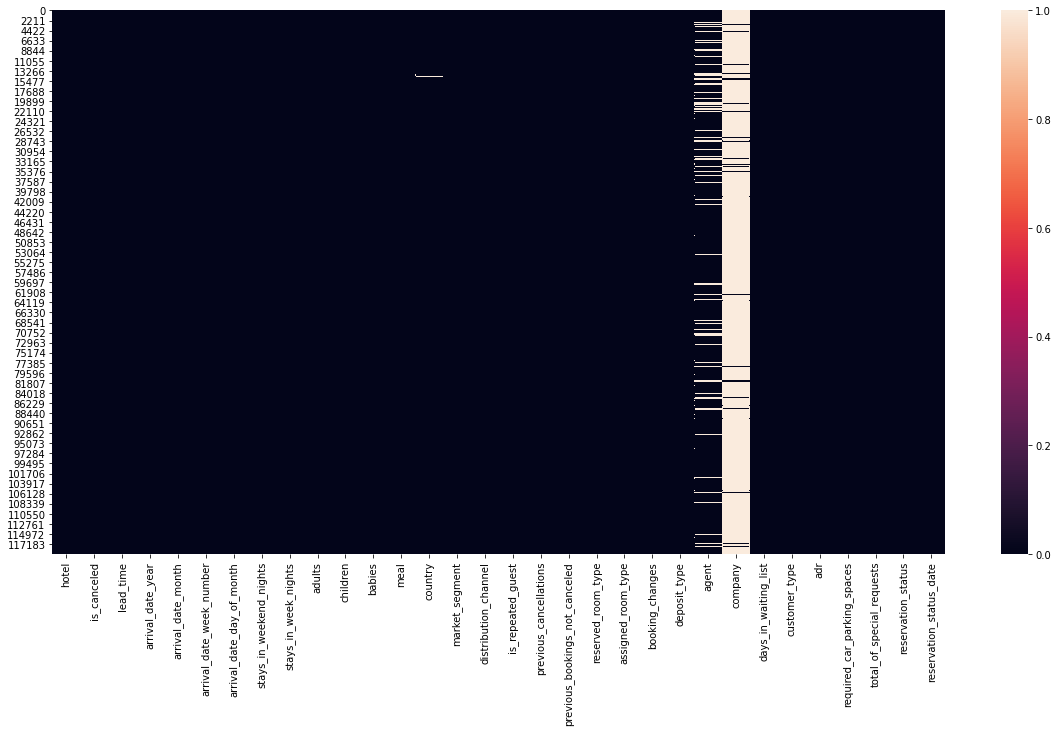

In [10]:
# Plotting heatmap of null values

fig,axes = plt.subplots(1,1,figsize=(20,10))
sns.heatmap(df.isna())
plt.show()

## Conclusion:

# 1. There are four columns which contains null values are Country, agent, company and children.

# 2. Approx 94% of Company column is filled with null values.

In [11]:
# Before handling null values, first create a copy of original dataset.

hotel_df = df.copy()

## Columns like Agent and Company have maximum number of null values as compared to other columns and we will replace all null values with 0, because these are not missing values instead they will be considered as "Not Applicable".

In [12]:
# Let's handle null values.
# Replacing null values of column Agent and Company with 0

hotel_df[['agent', 'company']] = hotel_df[['agent', 'company']].fillna(0.0)

## We will replace all missing values of column 'children' with rounded mean value as it contains the count of children.

In [13]:
# Replace missing children values with rounded mean value

hotel_df['children'].fillna(round(df['children'].mean()), inplace = True)

## Now, we will replace NULL values of 'country' column with mode of that column.

In [14]:
# Replace missing values of country column with mode.

hotel_df['country'].fillna(df['country'].mode().to_string(), inplace=True)

## Let's explore some columns.

In [15]:
hotel_df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [16]:
hotel_df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [17]:
hotel_df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [18]:
hotel_df['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [19]:
hotel_df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [20]:
hotel_df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [21]:
hotel_df['adults'].value_counts()

2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
55        1
50        1
40        1
10        1
6         1
Name: adults, dtype: int64

In [22]:
hotel_df['children'].value_counts()

0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [23]:
hotel_df['babies'].value_counts()

0     118473
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

# There are many rows that have zero guests including adults, children and babies, we need to remove those rows because they do not make any sense.

In [24]:
# Drop those rows which have adult, babies and children equals to 0

hotel_df = hotel_df.drop(df[(hotel_df.adults + hotel_df.babies + hotel_df.children)==0].index)

In [25]:
# Let's now check the shape of dataframe

hotel_df.shape

(119210, 32)

In [26]:
# Descriptive statistics of dataset

hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,2016.156472,27.163376,15.798717,0.927053,2.499195,1.859206,0.104043,0.007961,0.031499,0.087191,0.137094,0.218799,74.889078,10.735400,2.321215,101.969092,0.062553,0.571504
std,0.483012,106.875450,0.707485,13.601107,8.781070,0.995117,1.897106,0.575186,0.398836,0.097509,0.174663,0.844918,1.498137,0.638504,107.168884,53.830143,17.598002,50.434007,0.245360,0.792876
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.500000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.950000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


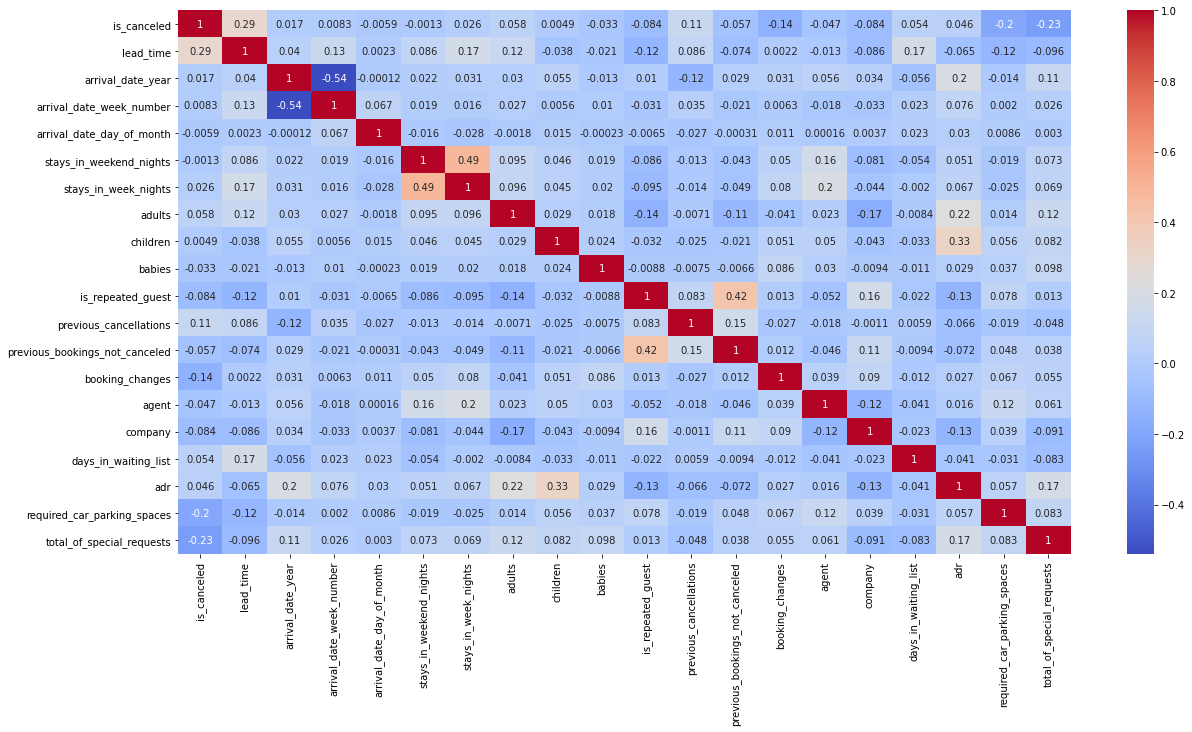

In [27]:
# Correlation heatmap

plt.figure(figsize=(20,10))
sns.heatmap(hotel_df.corr(), cmap="coolwarm", annot=True)

## From the above correlation heatmap it is clear that 'is_canceled' is highly positively correlated with 'lead_time' as compared to other features.

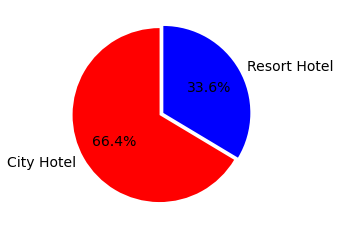

In [28]:
# Pie plot to show types of hotels.

labels = hotel_df['hotel'].value_counts().index.tolist()
sizes = hotel_df['hotel'].value_counts().tolist()
explode = (0, 0.05)
colors = ['red', 'blue']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle =90, textprops={'fontsize': 14})
plt.show()

## 1. How many booking were cancelled in both type of hotels ?

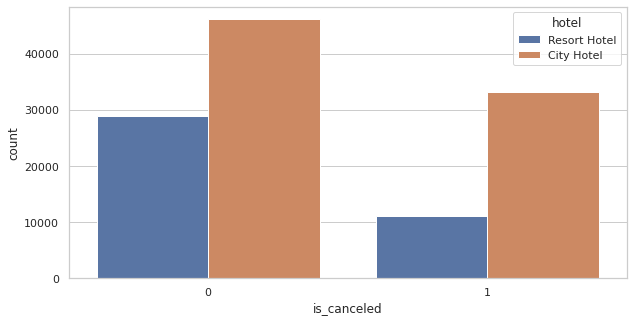

In [29]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="is_canceled", hue ='hotel',data=hotel_df)

## In Resort hotel, booking cancellation is less as compared  to City hotel. And overall booking cancellation is low.

## 2. Which month is the most occupied and which is the least occupied?

In [30]:
# value_counts counts the number of times each values has appeared

hotel_df.arrival_date_month.value_counts(normalize=True)

August       0.116274
July         0.106065
May          0.098817
October      0.093507
April        0.092928
June         0.091679
September    0.088080
March        0.081939
February     0.067545
November     0.056799
December     0.056698
January      0.049669
Name: arrival_date_month, dtype: float64

In [31]:
month_df = hotel_df[hotel_df['is_canceled']==0]['arrival_date_month'].value_counts().reset_index().rename(columns = {'index':'month','arrival_date_month':'number_of_bookings'})
month_df

,month,number_of_bookings
0,August,8624
1,July,7907
2,May,7103
3,October,6901
4,March,6620
5,April,6560
6,June,6395
7,September,6385
8,February,5359
9,November,4651


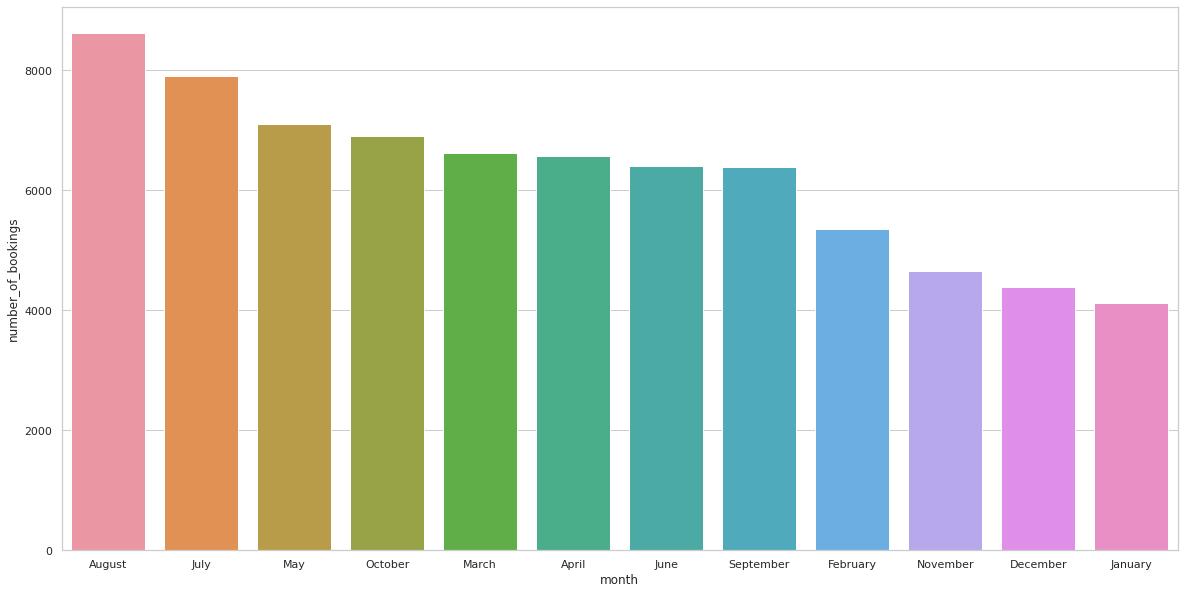

In [32]:
# Barplot of number of bookings in each month

plt.figure(figsize=(20,10))
ax = sns.barplot(x="month", y="number_of_bookings", data = month_df)

In [33]:
month_hotel_type = hotel_df[hotel_df['is_canceled']==0].groupby(['arrival_date_month','hotel'])['hotel'].count().unstack()
month_hotel_type

hotel,City Hotel,Resort Hotel
arrival_date_month,,
April,4010,2550
August,5367,3257
December,2377,2014
February,3051,2308
January,2249,1866
July,4770,3137
June,4358,2037
March,4049,2571
May,4568,2535


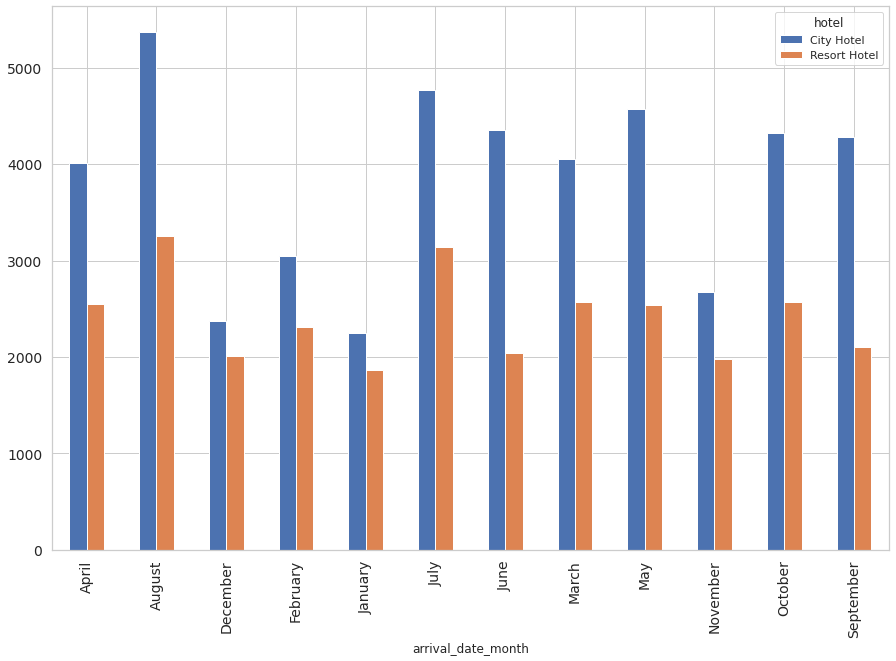

In [34]:
# Barplot of number of bookings in each month for both hotels.

ax = month_hotel_type.plot.bar(figsize = (15,10),fontsize = 14)

## August is the most occupied month with 11.65% bookings and January is the least occupied month with 4.94% bookings.

# 3. From which country most guests are coming?

In [35]:
# Value counts of top 10 countries from where maximum number of bookings happened

top_10_countries = hotel_df[hotel_df['is_canceled']==0]['country'].value_counts()[:10]

In [36]:
top_10_countries = top_10_countries.reset_index().rename(columns = {'index':'country','country':'number_of_bookings'})
top_10_countries['percentage'] = (top_10_countries['number_of_bookings']/top_10_countries['number_of_bookings'].sum())*100

In [37]:
top_10_countries

,country,number_of_bookings,percentage
0,PRT,20977,33.993421
1,GBR,9668,15.667083
2,FRA,8468,13.722472
3,ESP,6383,10.343710
4,DEU,6067,9.831629
5,IRL,2542,4.119334
6,ITA,2428,3.934596
7,BEL,1868,3.027111
8,NLD,1716,2.780794
9,USA,1592,2.579851


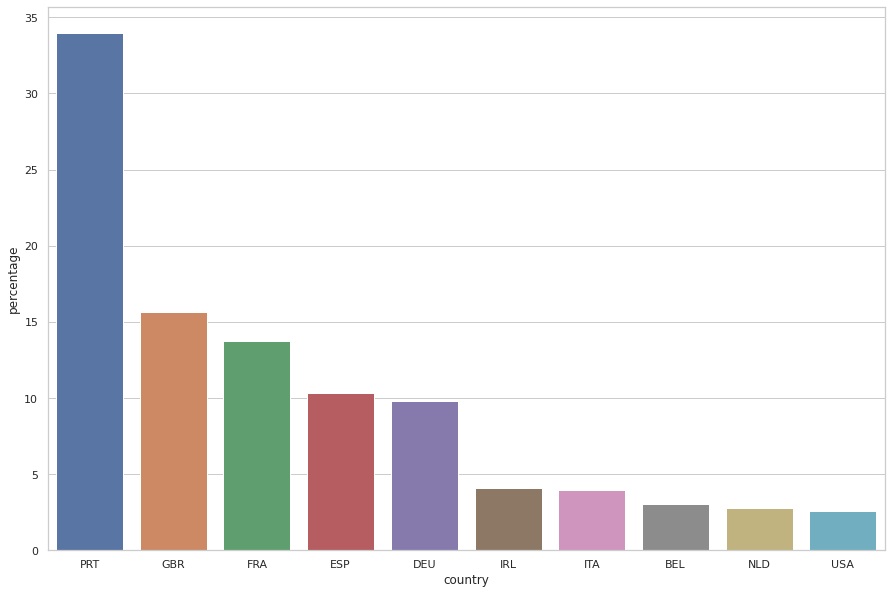

In [38]:
# Bar plot of top 10 countries

plt.figure(figsize=(15,10))
ax = sns.barplot(x="country", y="percentage", data=top_10_countries)

## More visitors are from western europe, namely Portugal,France, Great Britain and Spain being the highest.

#4. What are the number of weekend vs weekdays night bookings for resort hotels?

In [39]:
# First we will take only not cancelled booking values

not_canceled_data = hotel_df[hotel_df['is_canceled']==0]

In [40]:
# Total number of week night stay.

week_nights = not_canceled_data[not_canceled_data['hotel'] == 'Resort Hotel']['stays_in_week_nights'].sum()

In [41]:
# Total number of weekend night stay.

weekend_nights = not_canceled_data[not_canceled_data['hotel'] == 'Resort Hotel']['stays_in_weekend_nights'].sum()

Text(0.5, 1.0, 'Number of bookings for week and weekend nights for Resort type hotel')

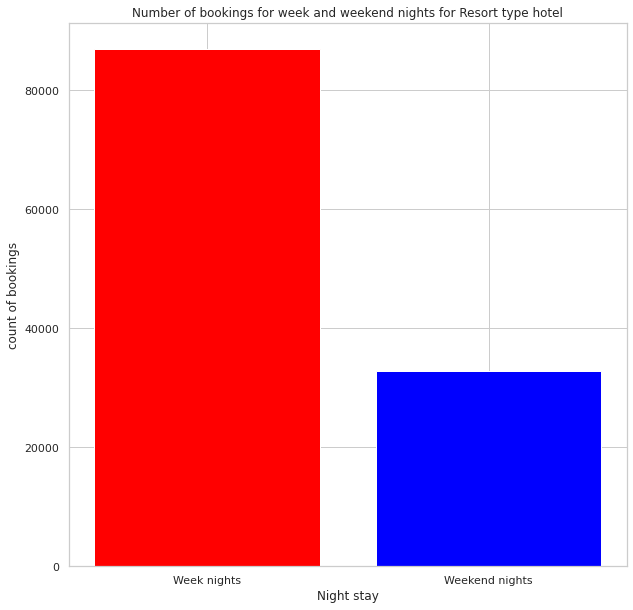

In [42]:
# Bar plot showing week nights and weekend nights stay for Resort hotels.

plt.figure(figsize=(10,10))
plt.bar(x=['Week nights','Weekend nights'],height = [week_nights,weekend_nights], color = ['red','blue'])
plt.xlabel('Night stay')
plt.ylabel('count of bookings')
plt.title('Number of bookings for week and weekend nights for Resort type hotel')

# 5. Let's check the distribution of adr.

In [43]:
# not_canceled dataframe that we have created earlier to get only those bookings which are not canceled.

not_canceled_data[not_canceled_data['adr'] == 0][not_canceled_data['market_segment']=='Complementary'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
125,Resort Hotel,0,32,2015,July,27,4,0,1,4,0.0,0,FB,PRT,Complementary,Direct,0,0,0,H,H,2,No Deposit,0.0,0.0,0,Transient,0.0,0,1,Check-Out,2015-07-05
1705,Resort Hotel,0,3,2015,September,37,10,0,1,1,0.0,0,BB,PRT,Complementary,Direct,0,0,0,C,H,0,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-09-11
2240,Resort Hotel,0,13,2015,October,41,7,0,2,2,0.0,0,FB,PRT,Complementary,Direct,0,0,0,F,F,0,No Deposit,0.0,0.0,0,Transient,0.0,0,2,Check-Out,2015-10-09
2242,Resort Hotel,0,0,2015,October,41,7,0,1,3,0.0,0,BB,AGO,Complementary,Direct,0,0,0,A,C,1,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-10-08
2448,Resort Hotel,0,1,2015,October,42,16,0,1,1,0.0,0,HB,PRT,Complementary,Direct,0,0,0,E,D,0,No Deposit,0.0,0.0,0,Transient,0.0,0,3,Check-Out,2015-10-17


### We have filtered our not_canceled_data dataframe on the basis of market segment as Complementary.

# The adr column consist of values which are euqal to 0. However, there are few rows where we see the market segment as Complementary for all those values and it makes sense. Other than those all other values seems as an anamoly and needs to be removed.

In [44]:
# Let's filter our copied dataset and remove anamolies.

hotel_df= hotel_df.drop(hotel_df[(hotel_df['adr'] == 0) & (hotel_df['market_segment'] != 'Complementary')].index)

In [45]:
hotel_df[hotel_df['adr']==0].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
125,Resort Hotel,0,32,2015,July,27,4,0,1,4,0.0,0,FB,PRT,Complementary,Direct,0,0,0,H,H,2,No Deposit,0.0,0.0,0,Transient,0.0,0,1,Check-Out,2015-07-05
1705,Resort Hotel,0,3,2015,September,37,10,0,1,1,0.0,0,BB,PRT,Complementary,Direct,0,0,0,C,H,0,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-09-11
2240,Resort Hotel,0,13,2015,October,41,7,0,2,2,0.0,0,FB,PRT,Complementary,Direct,0,0,0,F,F,0,No Deposit,0.0,0.0,0,Transient,0.0,0,2,Check-Out,2015-10-09
2242,Resort Hotel,0,0,2015,October,41,7,0,1,3,0.0,0,BB,AGO,Complementary,Direct,0,0,0,A,C,1,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-10-08
2448,Resort Hotel,0,1,2015,October,42,16,0,1,1,0.0,0,HB,PRT,Complementary,Direct,0,0,0,E,D,0,No Deposit,0.0,0.0,0,Transient,0.0,0,3,Check-Out,2015-10-17


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


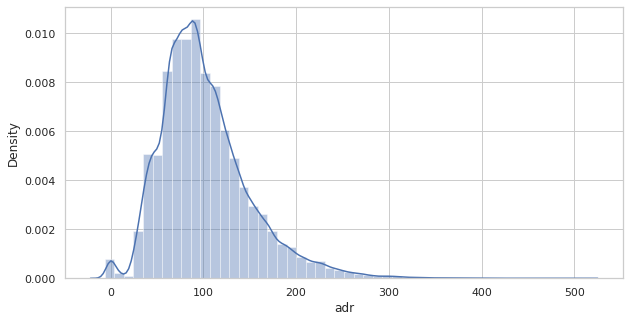

In [46]:
# Let's check distribution of adr column.

plt.figure(figsize=(10,5))
ax = sns.distplot(hotel_df[hotel_df['is_canceled']==0]['adr'])

In [47]:
# Central value of distribution.

hotel_df[hotel_df['is_canceled']==0]['adr'].median()

93.75

In [48]:
# Most occured value.

hotel_df[hotel_df['is_canceled']==0]['adr'].mode()

0    65.0
dtype: float64

In [49]:
# Average value.

hotel_df[hotel_df['is_canceled']==0]['adr'].mean()

101.5789206435013

## The above distribution plot is a right-skewed distribution, with an average adr of 100.57. Half of the adr values are less than 93.7 and the most repeated adr value is 65.

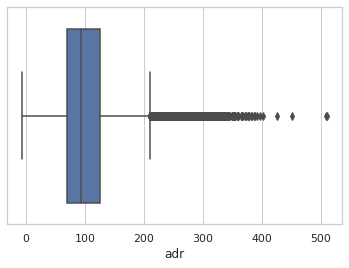

In [50]:
# Boxplot of adr column.

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=hotel_df[hotel_df['is_canceled']==0]['adr'])

# 6. Which months have cheaper booking rates?

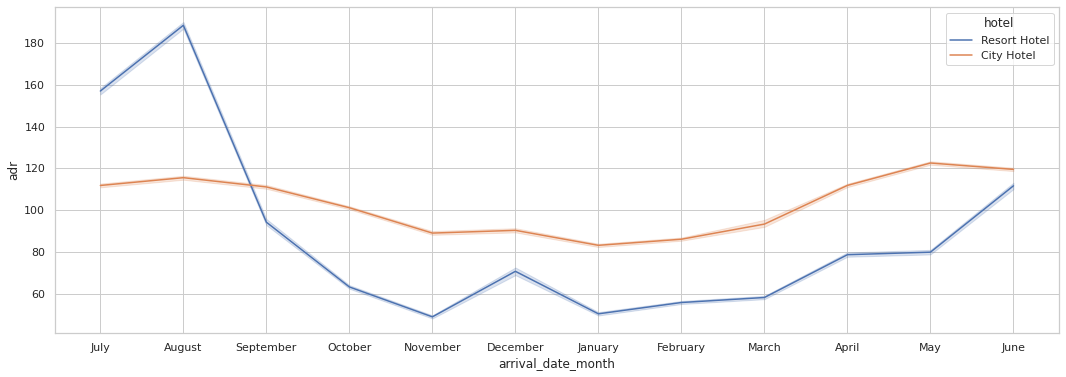

In [51]:
# Lineplot of the adr for different hotel types.

plt.figure(figsize=(18,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= hotel_df)
plt.show()

## For both city and resort hotels, November to January have cheaper average daily rates.

## 7. No of customers repeated their bookings.

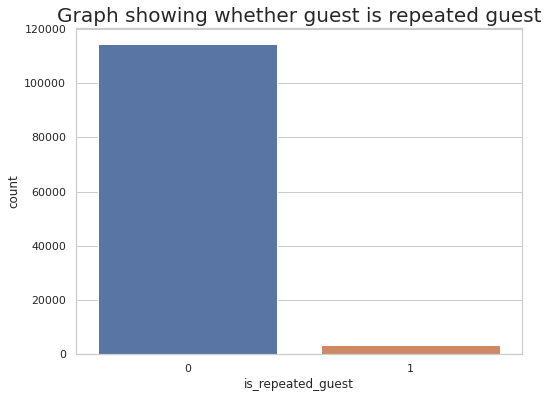

In [52]:
# Countplot of number of customers repeated their bookings.

plt.figure(figsize=(8,6))
sns.countplot(data = hotel_df, x = 'is_repeated_guest').set_title('Graph showing whether guest is repeated guest', fontsize = 20)
plt.show()

## From the above plot it is clear that most customers are not repeating their booking.

# 8. Most booked accomodation type

## **We will going to check whether the booking was made for an individual or a couple or a family(A couple is a group of 2 adults and family contains people more than 2).**

In [108]:
# Filter the data on the basis of individual, couple and family.

individual = hotel_df[hotel_df['is_canceled']==0][(hotel_df['adults']==1) & (hotel_df['children'] == 0) & (hotel_df['babies'] == 0)]
couple = hotel_df[hotel_df['is_canceled']==0][(hotel_df['adults']==2) & (hotel_df['children'] == 0) & (hotel_df['babies'] == 0)]
family = hotel_df[hotel_df['is_canceled']==0][(hotel_df['adults'] )+ (hotel_df['children']) + (hotel_df['babies'] ) > 2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [109]:
# Shape of dataset containing only not cancelled bookings.

total_count = hotel_df[(hotel_df['is_canceled']==0)].shape[0]

In [111]:
# Calculating the percentage of booking of each type of accomodations.

percentage = [round(len(item)/total_count * 100) for item in [individual,couple,family]]

In [112]:
types_of_accomodation = ['Individual','Couple','Family']

In [113]:
# Dictionary to store types of accomodation and their percentage of bookings.

dict(zip(types_of_accomodation,percentage))

{'Couple': 66, 'Family': 13, 'Individual': 21}

In [115]:
# Creating dataframe

data = pd.DataFrame({'types_of_accomodation':types_of_accomodation,'percentage':percentage})
data

,types_of_accomodation,percentage
0,Individual,21
1,Couple,66
2,Family,13


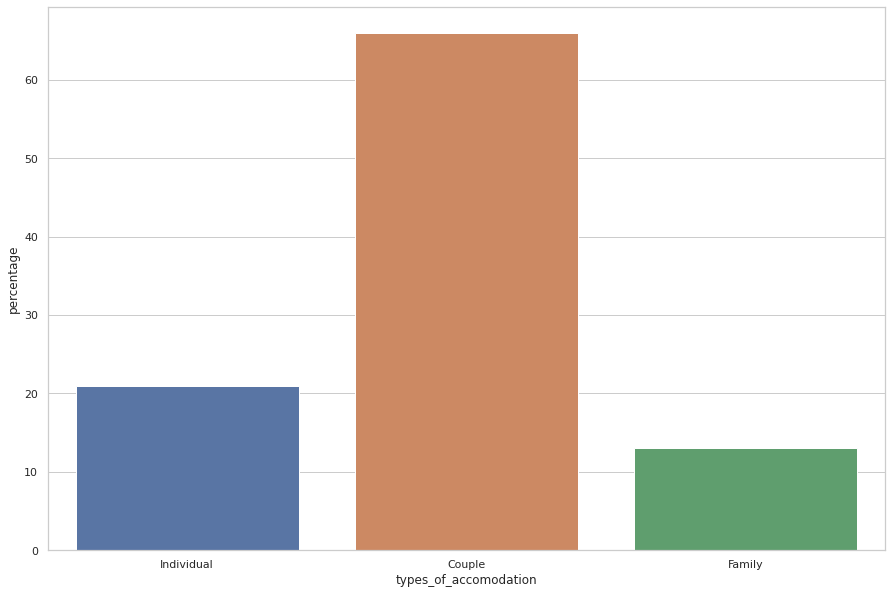

In [117]:
# Barplot of different types of accomodations.

plt.figure(figsize=(15,10))
ax = sns.barplot(x="types_of_accomodation", y="percentage", data = data)

## Percentage of booking is high in case of 'Couple', which means maximum number of booking made by couples in both type of hotels.

# 9. Number of bookings made by different market segment.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


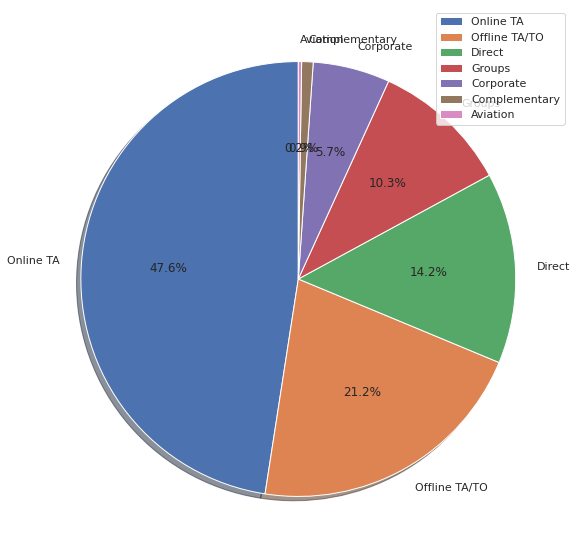

In [130]:
# Total bookings per market segment.

plt.figure(figsize = (20,10))
segments=not_canceled_data["market_segment"].value_counts()

# pie plot

ax = plt.pie(segments,
             labels=segments.index,
             autopct='%1.1f%%',
             shadow=True, startangle=90
             )

plt.legend(ax, labels = segments.index, loc="best")

## Maximum number of bookings made by Online TA, followed by Offline TA and Direct.

# 10. Number of customers repeated their bookings.

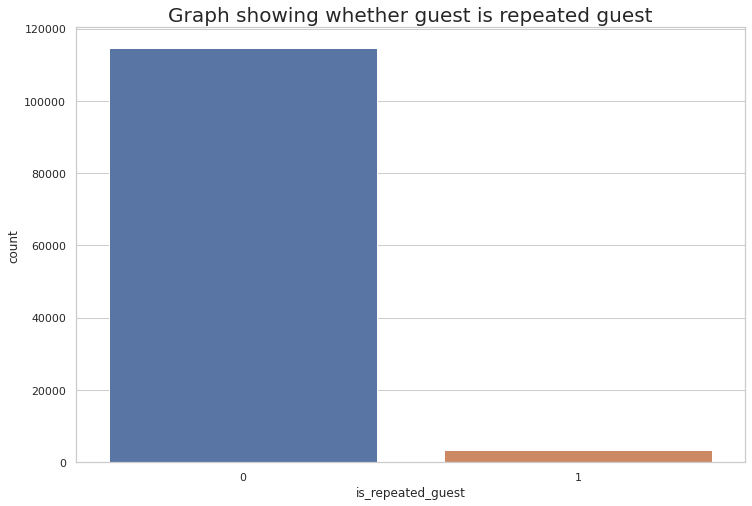

In [138]:
# Bar plot showing whether customers repeating their bookings or not?

plt.figure(figsize=(12,8))
sns.countplot(data = hotel_df, x = 'is_repeated_guest').set_title('Graph showing whether guest is repeated guest', fontsize = 20)
plt.show()

## It is clear that number of repeating guests are very low.

# 11. How does lead time affect cancellation?

Text(0, 0.5, 'Cancelations [%]')

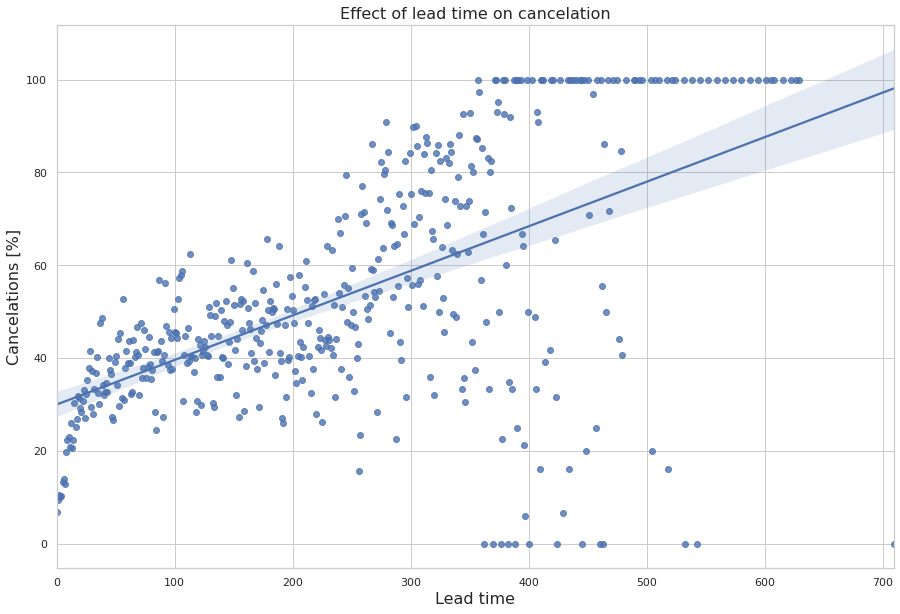

In [132]:
# Regplot showing relation between lead time and cancellation.

lead_time_df = hotel_df.groupby('lead_time')['is_canceled'].describe()
plt.figure(figsize=(15, 10))
sns.regplot(x=lead_time_df.index, y=lead_time_df["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)

## From above plot it is clear that as lead time increases, percentage of booking cancellation also increases.

# 12. How does deposit type affects cancelation?

Text(0, 0.5, 'Cancelations [%]')

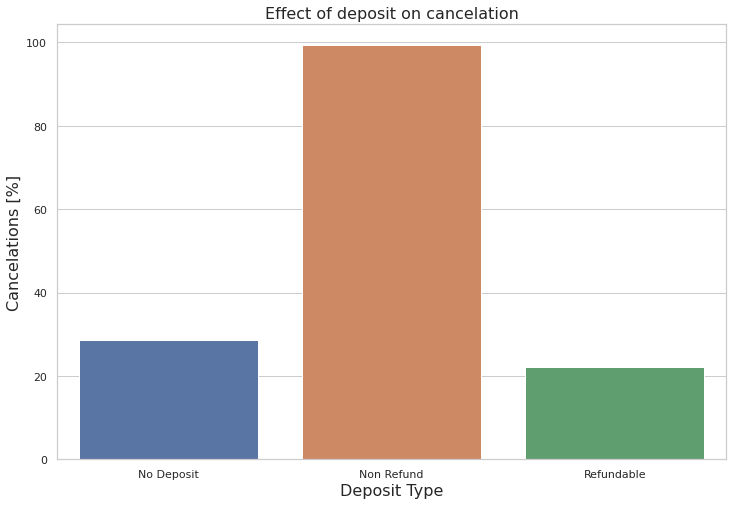

In [133]:
# Barplot to show which deposit type affects cancellation more.

deposit_df = hotel_df.groupby('deposit_type')['is_canceled'].describe()
plt.figure(figsize=(12, 8))
sns.barplot(x=deposit_df.index, y=deposit_df["mean"].values * 100)
plt.title("Effect of deposit on cancelation", fontsize=16)
plt.xlabel("Deposit Type", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)

## 'Non-Refund' deposit type increases the number of booking cancellations.

# 13. How does ADR affect cancelation?

(0.0, 100.0)

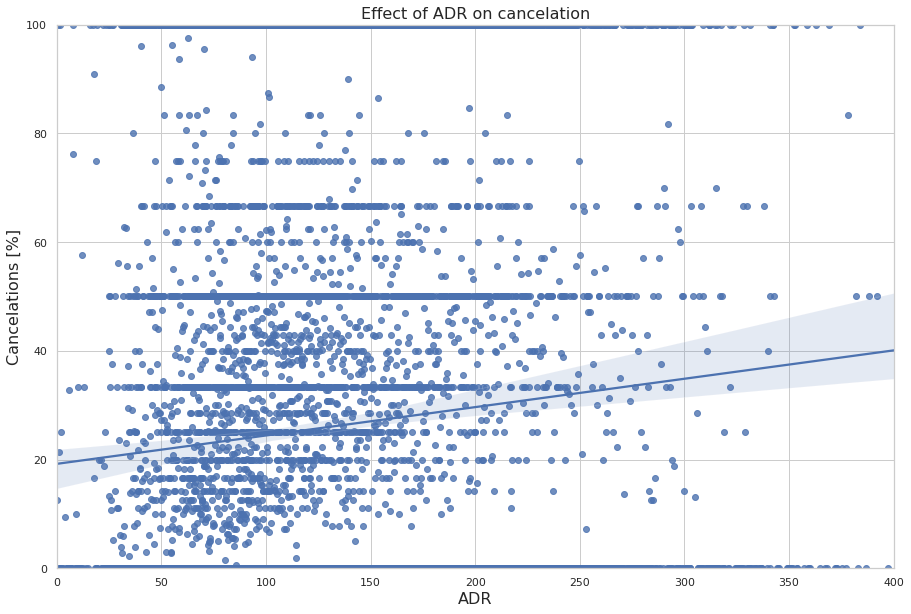

In [135]:
# Regplot showing relationship between ADR and cancellation.

adr_cancel_data = hotel_df.groupby("adr")["is_canceled"].describe()
plt.figure(figsize=(15, 10))
sns.regplot(x=adr_cancel_data.index, y=adr_cancel_data["mean"].values * 100)
plt.title("Effect of ADR on cancelation", fontsize=16)
plt.xlabel("ADR", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.xlim(0,400)
plt.ylim(0,100)

## The correlation between ADR and cancellations is positive which means as ADR increases number of booking cancellations will also be increases.

# **Conclusions**

# 1. Majority of the hotels booked are city hotel.
# 2. Non-Refund policies lead to a higher cancellation rates.
# 3. Target months between May to Aug. Those are peak months due to the summer period.
# 4. Majority of the guests are from Western Europe. So target this area for more customers.
# 5. Since there are very few repeated guests, focus should be on retaining the customers after their first visit.


